# Assignment: Working with Data

>Using the data below, answer the following questions:

>1) Which entities (top 5) had the largest population density in 2020?
>2) Which entities have more water area than land area?
>3) Which entities increased in population the most in the last 10 years?
>4) What state bird accounts for the largest population as of 2020? Land area?
>5) How many entities' largest city is their capital city?
>6) Which city has the largest percent drop from their largest city to their 5th largest? 100*(1st largest - 5th largest)/(1st largest)

In [2]:
import pandas as pd

In [3]:
facts = pd.read_csv('../data/state_facts.tsv',delimiter="\t")
facts.head(5)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_1,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,Birmingham,208928,Huntsville,204189.0,Montgomery,198956.0,Mobile,189572.0,Tuscaloosa,101113.0
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,Anchorage,291538,Juneau,32197.0,Fairbanks,31516.0,Wasilla,10529.0,Sitka,8647.0
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,Tafuna,7945,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,Phoenix,1660272,Tucson,545975.0,Mesa,508958.0,Chandler,257165.0,Scottsdale,255310.0
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,Little Rock,197881,Fort Smith,87845.0,Fayetteville,86751.0,Springdale,81029.0,Jonesboro,76990.0


In [4]:
#Which entities (top 5) had the largest population density in 2020?
facts['popDensity'] = facts['Pop_2020']/facts['Area_land']
facts.sort_values(by=['popDensity'], ascending=False).head(5)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,popDensity
9,District of Columbia,177,158,19,689545.0,601723,1*,Wood thrush,American Beauty Rose,Justitia Omnibus,...,702455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4364.208861
32,New Jersey,22591,19047,3544,9288994.0,8791894,12,Eastern goldfinch (American goldfinch),Violet,Liberty and Prosperity,...,282090,Jersey City,265549.0,Paterson,145627.0,Elizabeth,128885.0,Edison,100008.0,487.688035
43,Rhode Island,4001,2678,1324,1097379.0,1052567,2,Rhode Island Red,Violet,Hope,...,179335,Cranston,81274.0,Warwick,80847.0,Pawtucket,71847.0,East Providence,47476.0,409.775579
42,Puerto Rico,13791,8868,4924,3285874.0,3725789,1*,None,Flor de Maga,Joannes Est Nomen Eius,...,320967,Bayamón,170480.0,Carolina,147661.0,Ponce,133191.0,Caguas,124434.0,370.531574
23,Massachusetts,27336,20202,7134,7029917.0,6547629,9,Black-capped chickadee,Mayflower,Ense petit placidam sub libertate quietem,...,699927,Worcester,185877.0,Springfield,155032.0,Cambridge,118977.0,Lowell,111670.0,347.981239


In [5]:
#Which entities have more water area than land area?
facts[facts.Area_water > facts.Area_land]

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,popDensity
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,7945,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0,249.681818
12,Guam,1478,543,935,168.4,159358,1*,Guam rail (ko'ko'),Bougainvillea spectabilis,Where America's Day Begins,...,44943,Yigo,20539.0,Tamuning,19685.0,Mangilao,15191.0,Barrigada,8875.0,0.310129
37,Northern Mariana Islands,5117,472,4644,51.0,53883,1*,Mariana fruit-dove,Flores mayo,NaN,...,48220,Tinian2,3136.0,Rota2,2527.0,Northern Islands2,0.0,NaN,NaN,0.108051
48,United States Virgin Islands,1898,348,1550,106235.0,106405,1*,California gull,Yellow Elder,United in Pride and Hope,...,18481,Sion Farm3,13003.0,Northside3,10049.0,East End3,5128.0,Southcentral3,3277.0,305.272989


In [6]:
#Which entities increased in population the most in the last 10 years?
facts['incPop'] = facts['Pop_2020']-facts['Pop_2010']
facts.sort_values(by=['incPop'], ascending=False).head(1)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,popDensity,incPop
47,Texas,695662,676587,19075,29145505.0,25145561,38,Northern mockingbird,Bluebonnet sp.,Friendship,...,San Antonio,1532233.0,Dallas,1356785.0,Austin,993649.0,Fort Worth,902938.0,43.077247,3999944.0


In [7]:
#What state bird accounts for the largest population as of 2020? Land area?
facts.sort_values(by=['Pop_2020'], ascending=False).head(1)['State_bird']

5    California quail 
Name: State_bird, dtype: object

In [12]:
#How many entities' largest city is their capital city?
facts.loc[(facts['Capital'] == facts ['City_1'])]

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,popDensity,incPop
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,Tucson,545975.0,Mesa,508958.0,Chandler,257165.0,Scottsdale,255310.0,24.307722,759485.0
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,Fort Smith,87845.0,Fayetteville,86751.0,Springdale,81029.0,Jonesboro,76990.0,22.345490,95606.0
6,Colorado,269601,268431,1170,5773714.0,5029196,8,Lark bunting,Rocky Mountain columbine,Nil sine numine,...,Colorado Springs,483829.0,Aurora,374114.0,Fort Collins,167830.0,Lakewood,156798.0,21.509118,744518.0
9,District of Columbia,177,158,19,689545.0,601723,1*,Wood thrush,American Beauty Rose,Justitia Omnibus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4364.208861,87822.0
11,Georgia,153910,148959,4951,10711908.0,9687653,14,Brown thrasher,Cherokee rose,"Wisdom, Justice, Moderation",...,Augusta,196939.0,Columbus,194160.0,Macon,153095.0,Savannah,147181.0,71.911788,1024255.0
14,Idaho,216443,214045,2398,1839106.0,1567582,2,Mountain bluebird,"Syringa, mock orange",Esto perpetua,...,Meridian,106894.0,Nampa,96252.0,Idaho Falls,63398.0,Caldwell,56541.0,8.592147,271524.0
16,Indiana,94326,92789,1537,6785528.0,6483802,9,Northern cardinal,Peony,The crossroads of America,...,Fort Wayne,267633.0,Evansville,117963.0,South Bend,103290.0,Carmel,99329.0,73.128582,301726.0
17,Iowa,145746,144669,1077,3190369.0,3046355,4,Eastern goldfinch (American goldfinch),Wild rose,Our liberties we prize and our rights we will ...,...,Cedar Rapids,133174.0,Davenport,102085.0,Sioux City,82396.0,Iowa City,76290.0,22.052886,144014.0
23,Massachusetts,27336,20202,7134,7029917.0,6547629,9,Black-capped chickadee,Mayflower,Ense petit placidam sub libertate quietem,...,Worcester,185877.0,Springfield,155032.0,Cambridge,118977.0,Lowell,111670.0,347.981239,482288.0
26,Mississippi,125438,121531,3907,2961279.0,2967297,4,Northern mockingbird,Magnolia,Virtute et armis,...,Gulfport,71870.0,Southaven,54944.0,Biloxi,45968.0,Hattiesburg,45951.0,24.366450,-6018.0


In [13]:
#Which city has the largest percent drop from their largest city to their 5th largest? 100*(1st largest - 5th largest)/(1st largest)
facts['percDrop'] = 100*(facts['city_1_pop'] - facts['city_5_pop'])/(facts['city_1_pop'])
facts.sort_values(by=['incPop'], ascending=False).head(1)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,popDensity,incPop,percDrop
47,Texas,695662,676587,19075,29145505.0,25145561,38,Northern mockingbird,Bluebonnet sp.,Friendship,...,1532233.0,Dallas,1356785.0,Austin,993649.0,Fort Worth,902938.0,43.077247,3999944.0,61.17234


>Using the "state_dates.tsv" data, answer the remaining questions. You will need to merge the two data sets together:

>7) Of the states that joined the United States before 1790, what is the most common state flower?
>8) Which has the larger population density, the most dense US Territory or the least dense state?
>9) Make a graph that plots the populations of the largest city in each entity in the order in which they joined the US. Make the bars black
>10) Make two additional graphs like the one above but one for land area (green bars) and one for water area (blue bars)

Hint: `pd.read_csv('../data/state_dates.tsv',delimiter="\t")`

Hint: You likely want to convert the Date column to datetime. You might have to correct errors in the data as well.

Hint: `states['Date']<pd.datetime(1790,1,1)`

Hint: `pd.merge(****,****,left_on='USPS_code',right_on='Abbreviation',how='outer')`

In [35]:
# Merging the two datasets together
States_Data = pd.read_csv('../data/state_dates.tsv',delimiter="\t")
merged = pd.merge(facts,States_Data,left_on='USPS_code',right_on='Abbreviation',how='outer')
merged['Date'] = merged['Date'].astype('datetime64[ns]')

In [36]:
# Sample code to help with the plots

#import matplotlib as plt
#%config InlineBackend.figure_format ='retina' #This makes your plot clearer


#plot = *your df by date*[[*column*,'Abbreviation']].plot(kind='bar',figsize=(10,4))
#plot.set_xticklabels(*your df by date*['Abbreviation']);

In [42]:
# Of the states that joined the United States before 1790, what is the most common state flower?
Before1790 = merged.loc[merged['Date']<pd.datetime(1790,1,1)]
merged['State_bird'].value_counts().idxmax()

'Northern cardinal '

In [73]:
# Which has the larger population density, the most dense US Territory or the least dense state?
merged.sort_values(by=['popDensity'], ascending=True)

MostTerritory = merged.query('Name == "District of Columbia"')['popDensity'].values[0]
LeastState = merged['popDensity'][0]


if(MostTerritory > LeastState):
    print('Most Dense US Territory')
else:
    print('Least Dense US State')

Most Dense US Territory


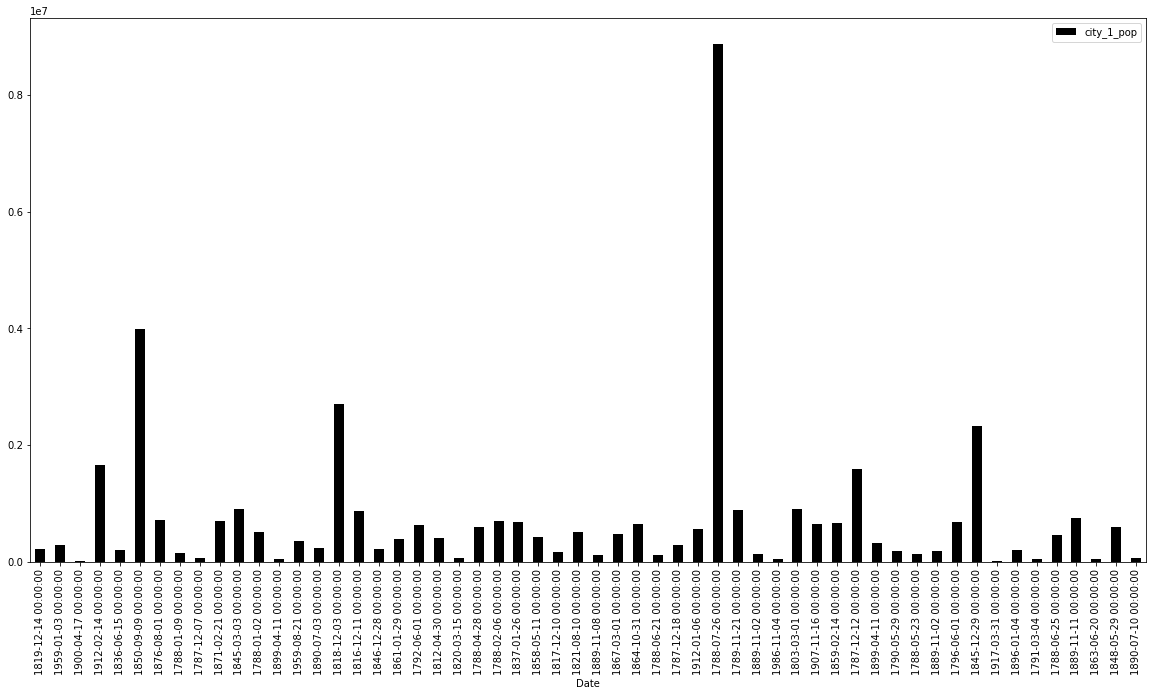

In [83]:
# Make a graph that plots the populations of the largest city in each entity in the order in which they joined the US. Make the bars black
merged.sort_values(by=['Date'], ascending=True)
merged.plot.bar(x='Date', y='city_1_pop', color = 'Black', figsize=(20,10))

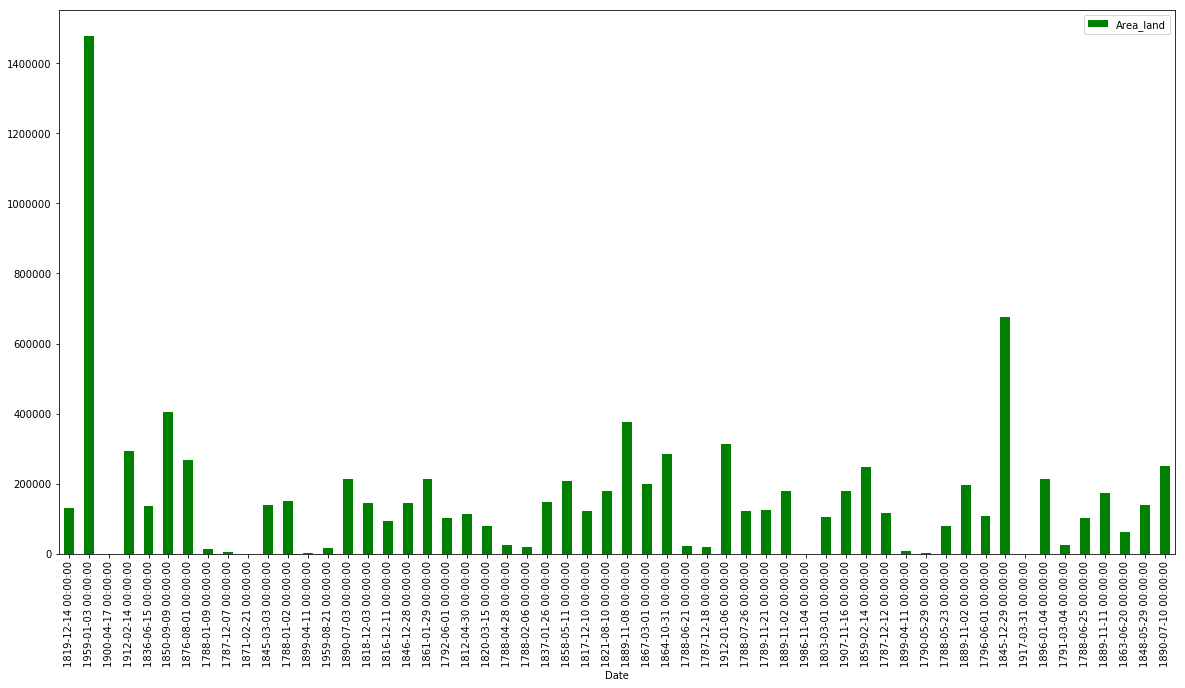

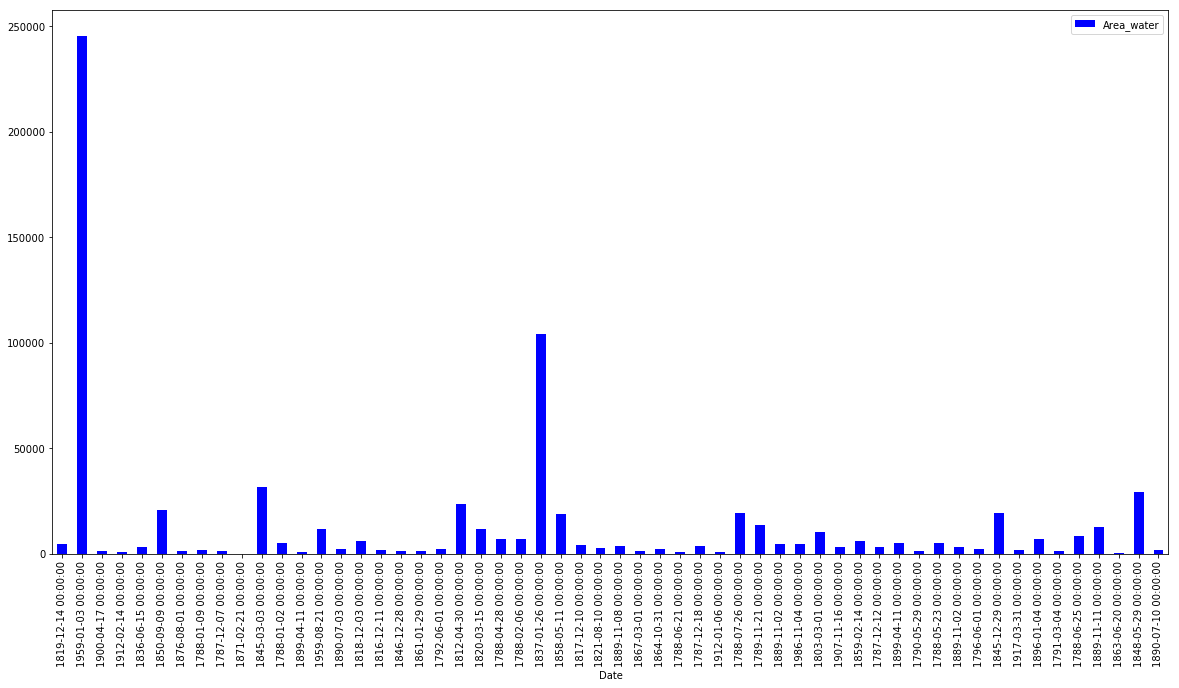

In [85]:
# Make two additional graphs like the one above but one for land area (green bars) and one for water area (blue bars)
merged.plot.bar(x='Date', y='Area_land', color = 'Green', figsize=(20,10))
merged.plot.bar(x='Date', y='Area_water', color = 'Blue', figsize=(20,10))